In [130]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [131]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [132]:
data = pd.read_csv('/content/gdrive/My Drive/DATASET_THESIS_UNDERGRAD/PUBLIC_PRIVATE_DATA_SMOTE_Public_Private.csv')
data

,PHQ_1,PHQ_2,PHQ_3,PHQ_4,PHQ_5,PHQ_6,PHQ_7,PHQ_8,PHQ_9,Age,Sex,Residence,Gadget_Use_Hour,Social_Media_Hour,Study_Hour,Smoke_Habit,Drugs_Intake,Relationship_With_Family,Romantic_Relationship,Number_Of_Friends,Frequency_Of_Going_Out,Choice_Of_Subject,Subject_Likeliness,University_Facility,Session_Jam,Tuition_Fee_Struggle,University_Subject_Criticism,Academic_Stress,Faculty_Cooperation,Classmate_Cooperation,Extra_Curricular_Activity,Bullied,Sexual_Harrassment,University_out_of_Dhaka,Rural,Private
0,3,3,3,3,2,3,3,0,3,2,2,1,3,3,1,2,2,1,3,2,1,1,1,1,2,3,4,4,5,3,1,3,1,0,0,1
1,0,0,0,0,1,0,0,0,0,2,1,1,2,2,1,3,2,1,2,4,2,1,2,2,2,3,1,5,2,4,2,1,1,1,0,1
2,3,1,1,1,1,1,2,1,0,2,1,1,3,2,1,3,2,1,3,2,1,1,1,1,2,3,3,4,3,3,1,3,1,0,0,1
3,1,1,1,1,0,1,1,0,0,2,1,1,3,2,2,2,2,1,3,3,1,1,1,1,2,3,2,4,3,4,1,3,1,0,0,1
4,1,1,1,0,1,0,1,0,0,1,1,2,3,2,1,2,2,1,2,4,2,1,1,2,2,2,1,4,4,5,5,3,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2103,1,1,1,1,0,1,1,0,0,2,1,1,3,2,1,1,2,1,2,2,1,1,1,1,2,3,1,4,3,3,1,3,1,0,0,1
2104,1,2,1,1,2,2,2,0,0,1,1,1,2,2,1,3,2,1,2,2,1,1,1,2,2,3,1,4,3,4,3,3,1,0,0,1
2105,2,1,3,1,0,2,3,1,1,1,1,1,2,1,1,3,1,2,3,2,1,1,1,1,2,3,2,4,3,4,5,3,1,0,0,1
2106,1,1,0,1,1,0,0,1,0,1,1,2,2,2,1,2,2,1,2,4,2,1,1,1,2,2,1,4,4,4,4,3,1,0,0,1


In [133]:
data.insert(0, column = "PHQ_Result", value = (data.iloc[:, 0:9].sum(axis=1)))
data.drop(data.iloc[:, 1:10], axis='columns', inplace=True)

In [134]:
data
# print(data)

,PHQ_Result,Age,Sex,Residence,Gadget_Use_Hour,Social_Media_Hour,Study_Hour,Smoke_Habit,Drugs_Intake,Relationship_With_Family,Romantic_Relationship,Number_Of_Friends,Frequency_Of_Going_Out,Choice_Of_Subject,Subject_Likeliness,University_Facility,Session_Jam,Tuition_Fee_Struggle,University_Subject_Criticism,Academic_Stress,Faculty_Cooperation,Classmate_Cooperation,Extra_Curricular_Activity,Bullied,Sexual_Harrassment,University_out_of_Dhaka,Rural,Private
0,23,2,2,1,3,3,1,2,2,1,3,2,1,1,1,1,2,3,4,4,5,3,1,3,1,0,0,1
1,1,2,1,1,2,2,1,3,2,1,2,4,2,1,2,2,2,3,1,5,2,4,2,1,1,1,0,1
2,11,2,1,1,3,2,1,3,2,1,3,2,1,1,1,1,2,3,3,4,3,3,1,3,1,0,0,1
3,6,2,1,1,3,2,2,2,2,1,3,3,1,1,1,1,2,3,2,4,3,4,1,3,1,0,0,1
4,5,1,1,2,3,2,1,2,2,1,2,4,2,1,1,2,2,2,1,4,4,5,5,3,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2103,6,2,1,1,3,2,1,1,2,1,2,2,1,1,1,1,2,3,1,4,3,3,1,3,1,0,0,1
2104,11,1,1,1,2,2,1,3,2,1,2,2,1,1,1,2,2,3,1,4,3,4,3,3,1,0,0,1
2105,14,1,1,1,2,1,1,3,1,2,3,2,1,1,1,1,2,3,2,4,3,4,5,3,1,0,0,1
2106,5,1,1,2,2,2,1,2,2,1,2,4,2,1,1,1,2,2,1,4,4,4,4,3,1,0,0,1


In [135]:
data.shape

(2108, 28)

In [136]:
#PHQ9 Depression Severity

d = data['PHQ_Result']
ba_value = []
for i in range(len(d)):

  if d[i] >=1 and d[i] <=4:
    #Minimal Depression
    ba_value.append(1)
    
  elif d[i] >=5 and d[i] <=9:
    #Mild Depression
    ba_value.append(2)

  elif d[i] >=10 and d[i] <=14:
    #Moderate Depression
    ba_value.append(3)

  elif d[i] >=15 and d[i] <=19:
    #Moderately Severe Depression
    ba_value.append(4)

  else:
    #Severe Depression
    ba_value.append(5)

data['PHQ_Result'] = ba_value

In [137]:
datanew = data
ak = datanew['Private']
ba_Value = []
for i in range(len(ak)):
    if ak[i] == 1:
        ba_Value.append('Private')
    else:
        ba_Value.append('Public')
datanew['Private'] = ba_Value
datanew.rename(columns={'Private':'University'}, inplace=True)

datanew['University'].value_counts()

Public     1054
Private    1054
Name: University, dtype: int64

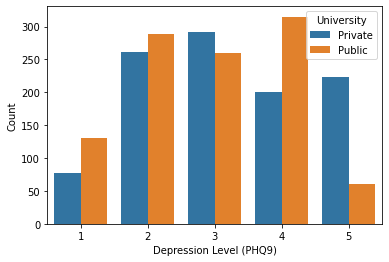

In [139]:
import seaborn as sns

# plt = sns.jointplot(x= 'PHQ_Result',data= datanew,kind= 'kde', height=6, space=1, hue= 'Private')
# plt.set_axis_labels('Depression Level (PHQ9)','', fontsize=12)

plt = sns.countplot(x="PHQ_Result",data=datanew, hue = 'University')
plt.set(xlabel='Depression Level (PHQ9)', ylabel='Count')
fig = plt.get_figure()
fig.savefig('Dataset.png')
!cp Dataset.png "/content/gdrive/My Drive/DATASET_THESIS_UNDERGRAD/"

In [ ]:
data.to_csv('PUBLIC_PRIVATE_DATA_FINAL.csv', index=False)



!cp PUBLIC_PRIVATE_DATA_FINAL.csv "/content/gdrive/My Drive/DATASET_THESIS_UNDERGRAD/"

In [ ]:
data['PHQ_Result'].value_counts()